In [1]:
# Imports
# Please refer to requirements.txt for a full list of all libraries and their versions used in this project.

import pandas as pd
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

import cv2
import os
from sklearn.utils import shuffle
from zipfile import ZipFile

In [2]:
ROOT_DIR = os.getcwd()
child_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

print(ROOT_DIR)

D:\Code\deep-age-detec\Age_Classification_with_Faces\code


In [3]:
# Reading one sample image.

img_path = child_dir + r"/sample_images/45_6201.png"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

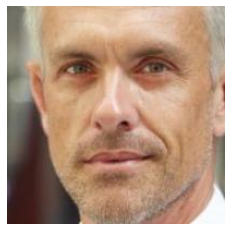

In [4]:
plt.imshow(img)
plt.axis('off');

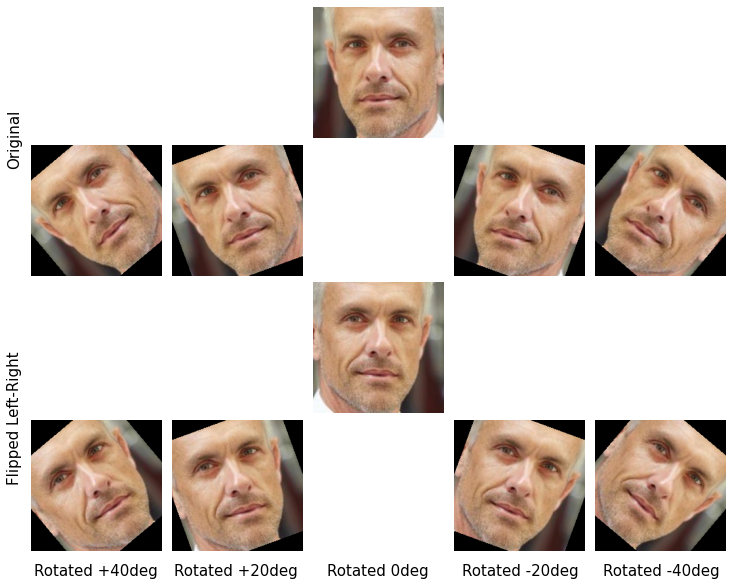

In [5]:
# Augmenting the above image and plotting the augmented images in subplots below.

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(12.5, 10))
plt.subplots_adjust(hspace=0.05, wspace=0.05)

ax= ax.ravel()
for i in range(20):
    ax[i].axis('off')

# Original image.
ax[2].imshow(img)

# Augmented image: original image with 40deg rotation.
img_rot_pos40 = ndimage.rotate(img, 40, reshape=False)
ax[5].imshow(img_rot_pos40)

# Augmented image: original image with 20deg rotation.
img_rot_pos20 = ndimage.rotate(img, 20, reshape=False)
ax[6].imshow(img_rot_pos20)

# Augmented image: original image with -20deg rotation.
img_rot_neg20 = ndimage.rotate(img, -20, reshape=False)
ax[8].imshow(img_rot_neg20)

# Augmented image: original image with -40deg rotation.
img_rot_neg40 = ndimage.rotate(img, -40, reshape=False)
ax[9].imshow(img_rot_neg40)

# Augmented image: original image flipped laterally.
img_fliplr = np.fliplr(img)
ax[12].imshow(img_fliplr)

# Augmented image: flipped image with 40deg rotation.
img_fliplr_rot_pos40 = ndimage.rotate(img_fliplr, 40, reshape=False)
ax[15].imshow(img_fliplr_rot_pos40)

# Augmented image: flipped image with 20deg rotation.
img_fliplr_rot_pos20 = ndimage.rotate(img_fliplr, 20, reshape=False)
ax[16].imshow(img_fliplr_rot_pos20)

# Augmented image: flipped image with -20deg rotation.
img_fliplr_rot_neg20 = ndimage.rotate(img_fliplr, -20, reshape=False)
ax[18].imshow(img_fliplr_rot_neg20)

# Augmented image: flipped image with -40deg rotation.
img_fliplr_rot_neg40 = ndimage.rotate(img_fliplr, -40, reshape=False)
ax[19].imshow(img_fliplr_rot_neg40)

plt.figtext(x=0.1, y=0.66, s="Original", fontsize=15, rotation=90)
plt.figtext(x=0.1, y=0.22, s="Flipped Left-Right", fontsize=15, rotation=90)
plt.figtext(x=0.13, y=0.09, s="Rotated +40deg", fontsize=15)
plt.figtext(x=0.285, y=0.09, s="Rotated +20deg", fontsize=15)
plt.figtext(x=0.455, y=0.09, s="Rotated 0deg", fontsize=15)
plt.figtext(x=0.605, y=0.09, s="Rotated -20deg", fontsize=15)
plt.figtext(x=0.762, y=0.09, s="Rotated -40deg", fontsize=15)

# Exporting plot image in PNG format.
plt.savefig(child_dir + r"/plot_images/image_data_augmentation.png", bbox_inches='tight');

In [6]:
# Unzipping the dataset file combined_faces.zip

combined_faces_zip_path = ROOT_DIR + r"/ZIPPED_DATASETS/combined_faces.zip"

with ZipFile(combined_faces_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping combined_faces.zip')

Done unzipping combined_faces.zip


In [7]:
train_df = pd.read_csv(child_dir + "/input_output/images_filenames_labels_train.csv")

In [8]:
train_df.head()

,filename,age,target
0,D:\Code\deep-age-detec\Age_Classification_with...,10,2
1,D:\Code\deep-age-detec\Age_Classification_with...,4,1
2,D:\Code\deep-age-detec\Age_Classification_with...,6,1
3,D:\Code\deep-age-detec\Age_Classification_with...,40,7
4,D:\Code\deep-age-detec\Age_Classification_with...,22,3


In [9]:
train_df.shape

(23440, 3)

In [10]:
train_aug_df = pd.DataFrame(columns=train_df.columns)
train_aug_df

,filename,age,target


In [11]:
# Making a new folder to save all augmented images as a new dataset.

os.mkdir(ROOT_DIR + r"/combined_faces_train_augmented")
new_path = ROOT_DIR + r"/combined_faces_train_augmented/"

In [12]:
# Running a for-loop through all the images in train_df and augmenting them.

for i in range(train_df.shape[0]):

    # Reading the image filepath, name, age and target values.
    img_path = train_df.loc[i, 'filename']
    img_name = img_path.split("\\")[-1]
    img_age = train_df.loc[i, 'age']
    img_target = train_df.loc[i, 'target']

    # Reading the image from the filepath and converting it to proper colour format in cv2.
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Creating the augmented versions of the image as shown above.
    img_rot_pos40 = ndimage.rotate(img, 40, reshape=False)
    img_rot_pos20 = ndimage.rotate(img, 20, reshape=False)
    img_rot_neg20 = ndimage.rotate(img, -20, reshape=False)
    img_rot_neg40 = ndimage.rotate(img, -40, reshape=False)
    img_fliplr = np.fliplr(img)
    img_fliplr_rot_pos40 = ndimage.rotate(img_fliplr, 40, reshape=False)
    img_fliplr_rot_pos20 = ndimage.rotate(img_fliplr, 20, reshape=False)
    img_fliplr_rot_neg20 = ndimage.rotate(img_fliplr, -20, reshape=False)
    img_fliplr_rot_neg40 = ndimage.rotate(img_fliplr, -40, reshape=False)

    # Creating new image names for the augmented images.
    img_name_wo_jpg = img_name.split(".")[0]
    img_name2 = img_name_wo_jpg+"_rot_pos40.jpg"
    img_name3 = img_name_wo_jpg+"_rot_pos20.jpg"
    img_name4 = img_name_wo_jpg+"_rot_neg20.jpg"
    img_name5 = img_name_wo_jpg+"_rot_neg40.jpg"
    img_name6 = img_name_wo_jpg+"_fliplr.jpg"
    img_name7 = img_name_wo_jpg+"_fliplr_rot_pos40.jpg"
    img_name8 = img_name_wo_jpg+"_fliplr_rot_pos20.jpg"
    img_name9 = img_name_wo_jpg+"_fliplr_rot_neg20.jpg"
    img_name10 = img_name_wo_jpg+"_fliplr_rot_neg40.jpg"

    # Saving the original image and all the augmented images into a new folder combined_faces_train_augmented.
    img_dest1 = new_path + img_name
    cv2.imwrite(img_dest1, img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest2 = os.path.join(new_path, img_name2)
    cv2.imwrite(img_dest2, img_rot_pos40, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest3 = os.path.join(new_path, img_name3)
    cv2.imwrite(img_dest3, img_rot_pos20, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest4 = os.path.join(new_path, img_name4)
    cv2.imwrite(img_dest4, img_rot_neg20, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest5 = os.path.join(new_path, img_name5)
    cv2.imwrite(img_dest5, img_rot_neg40, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest6 = os.path.join(new_path, img_name6)
    cv2.imwrite(img_dest6, img_fliplr, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest7 = os.path.join(new_path, img_name7)
    cv2.imwrite(img_dest7, img_fliplr_rot_pos40, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest8 = os.path.join(new_path, img_name8)
    cv2.imwrite(img_dest8, img_fliplr_rot_pos20, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest9 = os.path.join(new_path, img_name9)
    cv2.imwrite(img_dest9, img_fliplr_rot_neg20, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    img_dest10 = os.path.join(new_path, img_name10)
    cv2.imwrite(img_dest10, img_fliplr_rot_neg40, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

    # Creating a new temp_df for the augmented images (similar to train_df).
    temp_df = pd.DataFrame(columns=train_df.columns)
    temp_df.loc[1] = [img_dest1, img_age, img_target]
    temp_df.loc[2] = [img_dest2, img_age, img_target]
    temp_df.loc[3] = [img_dest3, img_age, img_target]
    temp_df.loc[4] = [img_dest4, img_age, img_target]
    temp_df.loc[5] = [img_dest5, img_age, img_target]
    temp_df.loc[6] = [img_dest6, img_age, img_target]
    temp_df.loc[7] = [img_dest7, img_age, img_target]
    temp_df.loc[8] = [img_dest8, img_age, img_target]
    temp_df.loc[9] = [img_dest9, img_age, img_target]
    temp_df.loc[10] = [img_dest10, img_age, img_target]

    # Concatenating temp_df with the new train_aug_df.
    train_aug_df = pd.concat([train_aug_df, temp_df], axis=0, ignore_index=True)

    # Keeping track of progress and printing relevant statements for the user.
    if (i+1) % 500 == 0:
        print(f"Images augmented: {i+1} of {train_df.shape[0]}")

print("\nDone augmenting all training dataset images and saved them into combined_faces_train_augmented.")

Images augmented: 500 of 23440
Images augmented: 1000 of 23440
Images augmented: 1500 of 23440
Images augmented: 2000 of 23440
Images augmented: 2500 of 23440
Images augmented: 3000 of 23440
Images augmented: 3500 of 23440
Images augmented: 4000 of 23440
Images augmented: 4500 of 23440
Images augmented: 5000 of 23440
Images augmented: 5500 of 23440
Images augmented: 6000 of 23440
Images augmented: 6500 of 23440
Images augmented: 7000 of 23440
Images augmented: 7500 of 23440
Images augmented: 8000 of 23440
Images augmented: 8500 of 23440
Images augmented: 9000 of 23440
Images augmented: 9500 of 23440
Images augmented: 10000 of 23440
Images augmented: 10500 of 23440
Images augmented: 11000 of 23440
Images augmented: 11500 of 23440
Images augmented: 12000 of 23440
Images augmented: 12500 of 23440
Images augmented: 13000 of 23440
Images augmented: 13500 of 23440
Images augmented: 14000 of 23440
Images augmented: 14500 of 23440
Images augmented: 15000 of 23440
Images augmented: 15500 of 234

In [13]:
train_aug_df.head()

,filename,age,target
0,D:\Code\deep-age-detec\Age_Classification_with...,10,2
1,D:\Code\deep-age-detec\Age_Classification_with...,10,2
2,D:\Code\deep-age-detec\Age_Classification_with...,10,2
3,D:\Code\deep-age-detec\Age_Classification_with...,10,2
4,D:\Code\deep-age-detec\Age_Classification_with...,10,2


In [14]:
train_df.shape

(23440, 3)

In [15]:
train_aug_df.shape

(234400, 3)

In [16]:
# Shuffling the augmented training dataset.

train_aug_df = shuffle(train_aug_df).reset_index(drop=True)

In [19]:
train_aug_df.to_csv(child_dir + r"/input_output/images_filenames_labels_train_augmented.csv", index=False)

In [20]:
# Defining a function to get all paths of files before zipping combined_faces_train_augmented folder.

def get_all_file_paths(path):

    file_paths = []

    # Crawling through each directory and subdirectories at the given path.
    for root, dirs, files in os.walk(path):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)

    # Returning all file paths.
    return file_paths

# Calling above defined function to get file paths of all images before zipping the folder.
file_paths = get_all_file_paths(ROOT_DIR + "/combined_faces_train_augmented")

In [21]:
len(file_paths)

234400

In [22]:
# Zipping the combined_faces_train_augmented dataset folder.

train_augmented_zip_path = ROOT_DIR + "/ZIPPED_DATASETS/combined_faces_train_augmented.zip"

with ZipFile(train_augmented_zip_path, 'w') as myzip:
    for file in file_paths:
        myzip.write(file)
    print('Done zipping combined_faces_train_augmented!')

Done zipping combined_faces_train_augmented!
